# Loading dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
dataset = pd.DataFrame(cancer["data"])
feature_names = cancer["feature_names"]
dataset.columns = feature_names
dataset["label"] = cancer["target"]

# Quick content analysis

In [2]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print(len(feature_names), "features")

# Check out for missing features
for feature in feature_names:
    missing_values = dataset[feature].isnull().sum()
    if missing_values > 0:
        print(f"Missing {missing_values} for feature {feature}")

30 features


# Shuffle, train-test split and normalization

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_names], dataset["label"], 
                                                    random_state=0, test_size=0.2, shuffle=True)

In [5]:
# Checkout class balance
print("Class distribution in training set")
print(y_train.value_counts(ascending=True))
print()
print("Class distribution in test set")
print(y_test.value_counts(ascending=True))

Class distribution in training set
0    165
1    290
Name: label, dtype: int64

Class distribution in test set
0    47
1    67
Name: label, dtype: int64


In [6]:
for feature in feature_names:
    mean = X_train[feature].mean()
    print(f"Mean for '{feature}': {mean}")

Mean for 'mean radius': 14.1124989010989
Mean for 'mean texture': 19.152879120879117
Mean for 'mean perimeter': 91.8182857142857
Mean for 'mean area': 653.8191208791208
Mean for 'mean smoothness': 0.09641334065934067
Mean for 'mean compactness': 0.10331865934065934
Mean for 'mean concavity': 0.08748453560439559
Mean for 'mean concave points': 0.04869002637362637
Mean for 'mean symmetry': 0.1809391208791209
Mean for 'mean fractal dimension': 0.06266802197802199
Mean for 'radius error': 0.4025235164835165
Mean for 'texture error': 1.2098806593406592
Mean for 'perimeter error': 2.825246813186814
Mean for 'area error': 40.28561758241758
Mean for 'smoothness error': 0.007003393406593407
Mean for 'compactness error': 0.02506322857142857
Mean for 'concavity error': 0.03147278593406593
Mean for 'concave points error': 0.011646349450549452
Mean for 'symmetry error': 0.02052527032967033
Mean for 'fractal dimension error': 0.0037102951648351652
Mean for 'worst radius': 16.256096703296706
Mean for

Since our features are not standardized, we will standardize them.

In [7]:
# We could also use sklearn preprocessing, but it's more convenient to use pandas to keep the column names
# from sklearn import preprocessing
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

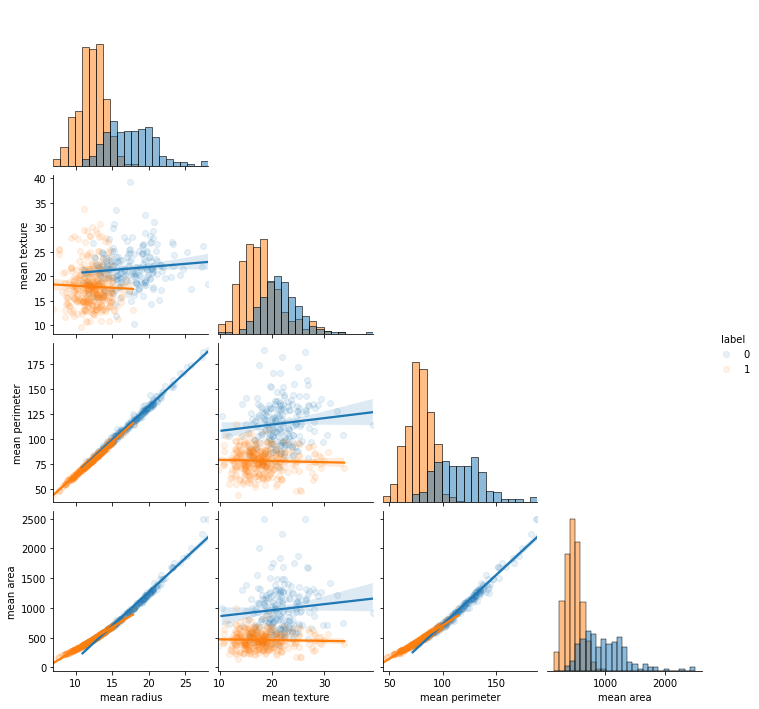

In [8]:
# 30 features is too big for plotting, but we do it for the first 4 features
# pd.plotting.scatter_matrix(X_train[feature_names[:2]], c=y_train)
import seaborn as sns
sns.pairplot(dataset[list(feature_names[:4])+["label"]], hue="label", corner=True,
             kind='reg', diag_kind='hist', plot_kws={'scatter_kws': {'alpha': 0.1}})

Now let's apply some classification techniques like k-NN, LDA, logistic regression, SVM...

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights="uniform")

knn.fit(X_train, y_train)

# We could use: pred = knn.predict(X_test)
print("Accuracy on train", knn.score(X_train, y_train))
print("Accuracy on test", knn.score(X_test, y_test))

Accuracy on train 1.0
Accuracy on test 0.9473684210526315


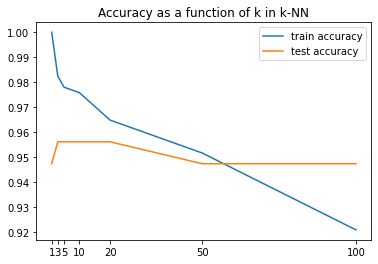

In [10]:
neighbors = [1, 3, 5, 10, 20, 50, 100]
train_accuracies = []
test_accuracies = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform") # you can try with "distance" instead
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))
    
from matplotlib import pyplot as plt
plt.title("Accuracy as a function of k in k-NN")
plt.plot(neighbors, train_accuracies, label="train accuracy")
plt.plot(neighbors, test_accuracies, label="test accuracy")
plt.xticks(neighbors)
plt.legend()
plt.show()

# LDA

Note that for binary classification, LDA is equivalent to regressing the indicator matrix. LDA assumes gaussian probability density with shared covariance matrices for all classes (here healthy and cancerous).

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# We have K=2 (nb_classes) and p=30 (nb_features), so nb_components = L = K-1 = 1 at most

lda = LinearDiscriminantAnalysis(solver="svd") # If SVD, we don't shrink (only if least-square covariance estimation)
lda.fit(X_train, y_train)

print("Accuracy on train", lda.score(X_train, y_train))
print("Accuracy on test", lda.score(X_test, y_test))

Accuracy on train 0.9626373626373627
Accuracy on test 0.9649122807017544


What the LDA does is essentially projecting the features onto the subspace spanned by the two classes centroids (a line), maximizing the inter-class variance and minimizing the intra-class variance in this projected space.

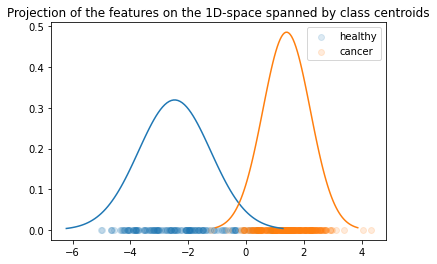

In [12]:
X_train_transformed = lda.transform(X_train)

X_train_transformed_healthy = X_train_transformed[y_train==0]
mean_healthy = X_train_transformed_healthy.mean()
std_healthy = X_train_transformed_healthy.std()

X_train_transformed_cancer = X_train_transformed[y_train==1]
mean_cancer = X_train_transformed_cancer.mean()
std_cancer = X_train_transformed_cancer.std()

plt.title("Projection of the features on the 1D-space spanned by class centroids")

import scipy.stats as stats
x = np.linspace(mean_healthy - 3*std_healthy, mean_healthy + 3*std_healthy, 100)
plt.plot(x, stats.norm.pdf(x, mean_healthy, std_healthy))
x = np.linspace(mean_cancer - 3*std_cancer, mean_cancer + 3*std_cancer, 100)
plt.plot(x, stats.norm.pdf(x, mean_cancer, std_cancer))

plt.scatter(X_train_transformed_healthy, 
            [0]*len(X_train_transformed_healthy), 
            label="healthy", alpha=0.15)
plt.scatter(X_train_transformed_cancer,
            [0]*len(X_train_transformed_cancer), 
            label="cancer", alpha=0.15)

plt.legend()
plt.show()

One could also look at QDA (quadradic discrimant analysis).

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression(penalty="l2", solver="lbfgs") # Try with penalty="none" to understand regularization effect

lr.fit(X_train, y_train)

print("Accuracy on train", lr.score(X_train, y_train))
print("Accuracy on test", lr.score(X_test, y_test))

Accuracy on train 0.989010989010989
Accuracy on test 0.9649122807017544


In [15]:
# Feature importance?
# Positive coefficients indicate features that predict class 1
# Negative coefficients indicate features that precit class 0
# Note that this can also be done for LDA equivalently

df = []
features_importance = lr.coef_[0]
for i in range(len(feature_names)):
    df.append([feature_names[i], abs(features_importance[i])])
df = pd.DataFrame(df, columns = ["feature name", "abs(coefficient)"])
df.sort_values(by="abs(coefficient)", ascending=False).head()

,feature name,abs(coefficient)
10,radius error,1.390831
21,worst texture,1.041078
13,area error,0.978933
27,worst concave points,0.971517
20,worst radius,0.931642


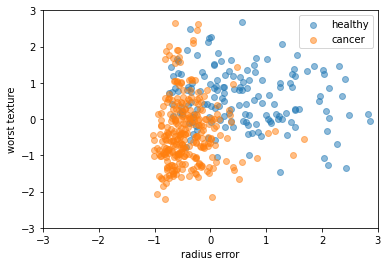

In [16]:
feature_x = "radius error"
feature_y = "worst texture"

plt.scatter(X_train[feature_x][y_train==0],
            X_train[feature_y][y_train==0], 
            label="healthy",
            alpha=0.5)
plt.scatter(X_train[feature_x][y_train==1],
            X_train[feature_y][y_train==1], 
            label="cancer",
            alpha=0.5)
plt.legend()
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Decision tree

Decision trees partition the feature space via iterative branching. 

The more depth, the better the tree performs on training data. Of course this means overfitting (super low bias, super high variance).

For additive trees (random forest, boosting, ...), one may sum low-bias high-variance trees to reduce overall variance. It is reasonable to not go too deep for these trees (simple trees).

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, y_train)

print("Accuracy on train", tree.score(X_train, y_train))
print("Accuracy on test", tree.score(X_test, y_test))

Accuracy on train 0.9714285714285714
Accuracy on test 0.9649122807017544


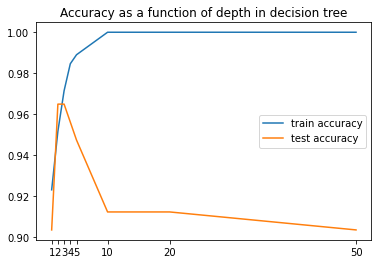

In [18]:
depths = [1, 2, 3, 4, 5, 10, 20, 50]
train_accuracies = []
test_accuracies = []
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    train_accuracies.append(tree.score(X_train, y_train))
    test_accuracies.append(tree.score(X_test, y_test))
    
from matplotlib import pyplot as plt
plt.title("Accuracy as a function of depth in decision tree")
plt.plot(depths, train_accuracies, label="train accuracy")
plt.plot(depths, test_accuracies, label="test accuracy")
plt.xticks(depths)
plt.legend()
plt.show()

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# To regularize the random forest, you can:
# - fix the max_depth of each tree to a low value (ex: 2 or 3)
# - set the max_features to use for each tree to sqrt(p)
# - use bootstrapping (each tree will only use a portion of the dataset)
forest = RandomForestClassifier(max_depth=3, # try changing this parameter (None, 1, 2, ...) 
                                max_features=None, # try with max_features="sqrt"
                                bootstrap=True)

forest.fit(X_train, y_train)

print("Accuracy on train", forest.score(X_train, y_train))
print("Accuracy on test", forest.score(X_test, y_test))

Accuracy on train 0.9802197802197802
Accuracy on test 0.9824561403508771


/Users/antoine/.pyenv/versions/3.7.3/envs/sensei/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# This can also be used for tree.
# Note that we can also use permutations
for i in range(len(feature_names)):
    print(f"Feature {i}: {forest.feature_importances_[i]:.5f} ({feature_names[i]})")

Feature 0: 0.00000 (mean radius)
Feature 1: 0.00737 (mean texture)
Feature 2: 0.00000 (mean perimeter)
Feature 3: 0.00000 (mean area)
Feature 4: 0.00259 (mean smoothness)
Feature 5: 0.00000 (mean compactness)
Feature 6: 0.00142 (mean concavity)
Feature 7: 0.07672 (mean concave points)
Feature 8: 0.00366 (mean symmetry)
Feature 9: 0.00095 (mean fractal dimension)
Feature 10: 0.00505 (radius error)
Feature 11: 0.00607 (texture error)
Feature 12: 0.00090 (perimeter error)
Feature 13: 0.04490 (area error)
Feature 14: 0.00244 (smoothness error)
Feature 15: 0.00000 (compactness error)
Feature 16: 0.01392 (concavity error)
Feature 17: 0.00000 (concave points error)
Feature 18: 0.00000 (symmetry error)
Feature 19: 0.00000 (fractal dimension error)
Feature 20: 0.01821 (worst radius)
Feature 21: 0.01748 (worst texture)
Feature 22: 0.08297 (worst perimeter)
Feature 23: 0.18975 (worst area)
Feature 24: 0.01124 (worst smoothness)
Feature 25: 0.00000 (worst compactness)
Feature 26: 0.01359 (worst co

The approach that maximizes accuracy (0.974) is a simple bagging (boostrap aggregation) of trees of depth 3 (which is obtained by setting max_features to None and bootstrap to True).

The fact that we don't manage to do much better compared to Decision Tree shows that the problem is simple enough and doesn't require advanced regularization. Data is already reasonably separable and not too noisy to require strong regularization strategies such as ensembling via random forest with subsampling of the features.

If the problem was more complex, we could think of trying out (with trees) AdaBoost, GradientBoost, etc.

# Multi-layer Perceptron (MLP)

In [21]:
from sklearn.neural_network import MLPClassifier
# 50 seems to be the right size for avoiding under/over-fitting
mlp = MLPClassifier(hidden_layer_sizes=(50,), batch_size=128, max_iter=500, random_state=3)
mlp.fit(X_train, y_train)
print("Accuracy on train", mlp.score(X_train, y_train))
print("Accuracy on test", mlp.score(X_test, y_test))

Accuracy on train 0.9956043956043956
Accuracy on test 0.9736842105263158


# PCA on features

In [22]:
from sklearn.decomposition import PCA

# Data is already whitened (standardized) so we don't need to set whitened to True
# Note that centering is required for SVD decomposition

pca = PCA(n_components=None) # keep all components (no filtering)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

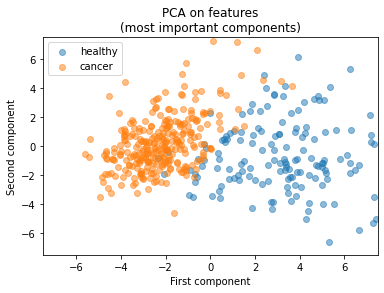

In [23]:
X_train_transformed = pca.transform(X_train)
feature_x_healthy = X_train_transformed[:, 0][y_train == 0]
feature_y_healthy = X_train_transformed[:, 1][y_train == 0]
feature_x_cancer = X_train_transformed[:, 0][y_train == 1]
feature_y_cancer = X_train_transformed[:, 1][y_train == 1]
plt.title("PCA on features\n(most important components)")
plt.scatter(feature_x_healthy, feature_y_healthy, label="healthy", alpha=0.5)
plt.scatter(feature_x_cancer, feature_y_cancer, label="cancer", alpha=0.5)
plt.legend()
plt.xlabel("First component")
plt.ylabel("Second component")
plt.xlim(-7.5, 7.5)
plt.ylim(-7.5, 7.5)
plt.show()

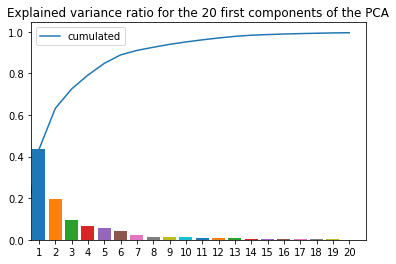

In [24]:
l = 20 # nb of components to visualize
plt.title(f"Explained variance ratio for the {l} first components of the PCA")
cumulated = [0]
for i, variance_ratio in enumerate(pca.explained_variance_ratio_[:l]):
    cumulated.append(variance_ratio+cumulated[-1])
    plt.bar(x=i+1, height=variance_ratio)
plt.xticks(range(1, l+1))
plt.plot(cumulated, label="cumulated")
plt.xlim(0.5, l+1)
plt.legend()
plt.show()

The two first components explain respectively 43% and 20% of the variance (cumulated, that's 63%)

In [25]:
# We look at the first row of the (n_components, n_features) matrix
# This gives the importance of each feature for computing the first component
# (in practice, this is the first singular vector for component 0)
abs(pca.components_[0])

array([0.22151036, 0.10450507, 0.22951189, 0.22365223, 0.13994442,
       0.24178096, 0.25999119, 0.26333456, 0.13270016, 0.05850358,
       0.20695134, 0.01284976, 0.21007605, 0.20308114, 0.0158805 ,
       0.16511631, 0.14173528, 0.18073348, 0.03361713, 0.10290725,
       0.230248  , 0.10553057, 0.23748257, 0.22734321, 0.12954467,
       0.20947161, 0.22958661, 0.25309767, 0.11974113, 0.13016752])

# To do left

- Most important features for tree, z-score
- AUC, recall/precision, cross-validation, bootstrap?
    - https://scikit-learn.org/stable/modules/cross_validation.html
    - https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- How to deal with missing values? Handling with trees
- How to deal with dummy variables?
- Bagging (boostrap), Adaboost, gradient boosting? maybe for more complex problems
    - https://machinelearningmastery.com/calculate-feature-importance-with-python/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html